<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ch-14" data-toc-modified-id="Ch-14-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ch 14</a></span><ul class="toc-item"><li><span><a href="#Variying-slopes-by-construction" data-toc-modified-id="Variying-slopes-by-construction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variying slopes by construction</a></span><ul class="toc-item"><li><span><a href="#m14.1" data-toc-modified-id="m14.1-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>m14.1</a></span></li></ul></li><li><span><a href="#Advanced-Varying-Slopes-(14.2)" data-toc-modified-id="Advanced-Varying-Slopes-(14.2)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Advanced Varying Slopes (14.2)</a></span></li><li><span><a href="#Social-relations-as-correlated-varying-effects" data-toc-modified-id="Social-relations-as-correlated-varying-effects-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Social relations as correlated varying effects</a></span></li><li><span><a href="#Continous-Categories-and-the-Gaussian-Process-(14.5)" data-toc-modified-id="Continous-Categories-and-the-Gaussian-Process-(14.5)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Continous Categories and the Gaussian Process (14.5)</a></span></li></ul></li><li><span><a href="#Misc" data-toc-modified-id="Misc-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Misc</a></span><ul class="toc-item"><li><span><a href="#rlkjcorr" data-toc-modified-id="rlkjcorr-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>rlkjcorr</a></span></li></ul></li></ul></div>

# Ch 14

## Variying slopes by construction

In [2]:
library(tidyverse)

# loads experimental branch of statistical rethinking pkg
library(rethinking)

In [3]:
## R code 14.1
a <- 3.5            # average morning wait time
b <- (-1)           # average difference afternoon wait time
sigma_a <- 1        # std dev in intercepts
sigma_b <- 0.5      # std dev in slopes
rho <- (-0.7)       # correlation between intercepts and slopes

In [4]:
## R code 14.2
Mu <- c( a , b )

Mu

[1]  3.5 -1.0

In [5]:
## R code 14.3  
cov_ab <- sigma_a*sigma_b*rho
Sigma <- matrix( c(sigma_a^2,cov_ab,cov_ab,sigma_b^2) , ncol=2 )

cov_ab
Sigma

[1] -0.35

1.00,-0.35
-0.35,0.25


In [6]:
## R code 14.4
# how matrices fill -> fills column first top to bottom, then next column
test <- matrix( c(1,2,3,4) , nrow=2 , ncol=2 ); test

1,3
2,4


In [7]:
## R code 14.5
sigmas <- c(sigma_a,sigma_b) # standard deviations
Rho <- matrix( c(1,rho,rho,1) , nrow=2 ) # correlation matrix
Rho

1.0,-0.7
-0.7,1.0


In [8]:
# now matrix multiply to get covariance matrix
Sigma <- diag(sigmas) %*% Rho %*% diag(sigmas)
Sigma


"---sigmas"
sigmas

1.00,-0.35
-0.35,0.25


[1] "---sigmas"

[1] 1.0 0.5

In [9]:
## R code 14.6
N_cafes <- 20

In [10]:
## R code 14.7
library(MASS)
set.seed(5) # used to replicate example
vary_effects <- mvrnorm( N_cafes , Mu , Sigma )

Warning message:
"package 'MASS' was built under R version 3.5.2"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [11]:
vary_effects %>% str
vary_effects %>% dim

 num [1:20, 1:2] 4.22 2.01 4.57 3.34 1.7 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


[1] 20  2

Look at the contents of vary_effects now. It should be a matrix with 20 rows and 2 columns. Each row is a café. The first column contains intercepts. The second column contains slopes.

In [14]:
vary_effects %>% round(2)

4.22,-1.61
2.01,-0.75
4.57,-1.95
3.34,-1.19
1.70,-0.59
4.13,-1.14
3.79,-1.63
3.95,-1.72
3.86,-0.91
3.47,-0.68
2.24,-0.62


In [15]:
## R code 14.8
a_cafe <- vary_effects[,1]
b_cafe <- vary_effects[,2]

In [16]:
library(ellipse)

Warning message:
"package 'ellipse' was built under R version 3.5.2"
Attaching package: 'ellipse'

The following object is masked from 'package:rethinking':

    pairs

The following object is masked from 'package:graphics':

    pairs



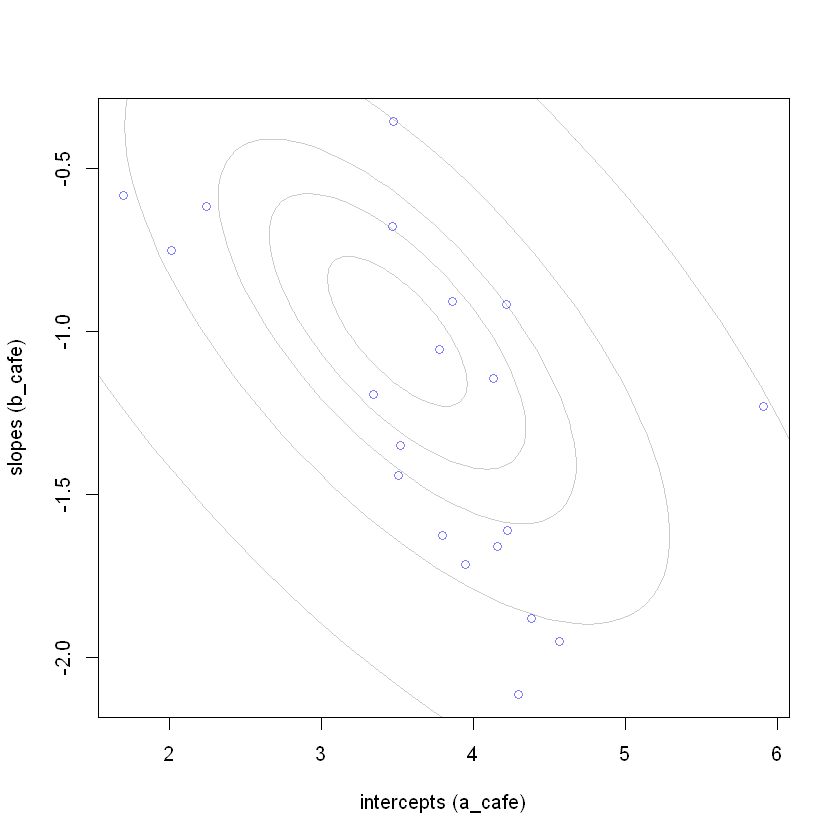

In [17]:

## R code 14.9
plot( a_cafe , b_cafe , col=rangi2 ,
    xlab="intercepts (a_cafe)" , ylab="slopes (b_cafe)" )

# overlay population distribution

for ( l in c(0.1,0.3,0.5,0.8,0.99) )
    lines(ellipse(Sigma,centre=Mu,level=l),col=col.alpha("black",0.2))


In [18]:
set.seed(22) 
N_visits <- 10
afternoon <- rep(0:1,N_visits*N_cafes/2)

cafe_id <- rep( 1:N_cafes , each=N_visits )

mu <- a_cafe[cafe_id] + b_cafe[cafe_id]*afternoon

sigma <- 0.5 # std dev within cafes

wait <- rnorm( N_visits*N_cafes , mu , sigma )

d <- data.frame( cafe=cafe_id , afternoon=afternoon , wait=wait )

In [19]:
d %>% str()

'data.frame':	200 obs. of  3 variables:
 $ cafe     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ afternoon: int  0 1 0 1 0 1 0 1 0 1 ...
 $ wait     : num  3.97 3.86 4.73 2.76 4.12 ...


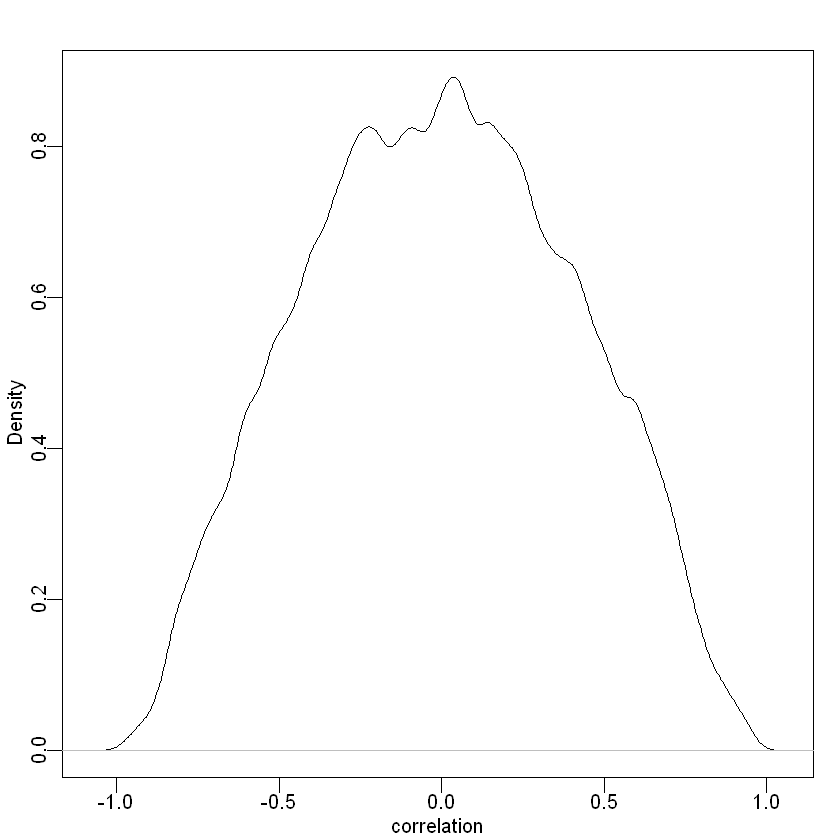

In [20]:
R <- rlkjcorr( 1e4 , K=3, eta=2 ) 
# k <- Dimension of correlation matrix

dens( R[,1,2] , xlab="correlation" )

In [21]:
R %>% summary()
R %>% str()


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9946 -0.1545  0.3059  0.3321  1.0000  1.0000 

 num [1:10000, 1:3, 1:3] 1 1 1 1 1 1 1 1 1 1 ...


### m14.1

In [22]:
## R code 14.10
set.seed(22)
N_visits <- 10
afternoon <- rep(0:1,N_visits*N_cafes/2)
cafe_id <- rep( 1:N_cafes , each=N_visits )
mu <- a_cafe[cafe_id] + b_cafe[cafe_id]*afternoon
sigma <- 0.5  # std dev within cafes
wait <- rnorm( N_visits*N_cafes , mu , sigma )
d <- data.frame( cafe=cafe_id , afternoon=afternoon , wait=wait )

In [23]:
dat <- list(
    cafe = d$cafe %>% as.integer(),
    afternoon = d$afternoon %>% as.integer(),
    wait = d$wait %>% as.numeric()
)


In [25]:
## R code 14.12
m14.1 <- ulam(
    alist(
        wait ~ normal( mu , sigma ),
        mu <- a_cafe[cafe] + b_cafe[cafe]*afternoon,
        c(a_cafe,b_cafe)[cafe] ~ multi_normal( c(a,b) , Rho , sigma_cafe ),
        a ~ normal(5,2),
        b ~ normal(-1,0.5),
        sigma_cafe ~ exponential(1),
        sigma ~ exponential(1),
        Rho ~ lkj_corr(2)
    ) , data=d , chains=4 , cores=4 )

ERROR: Error in symbols[[left[1]]]$dims[[1]]: object of type 'symbol' is not subsettable


## Advanced Varying Slopes (14.2)

In [26]:
## R code 14.18
library(rethinking)
data(chimpanzees)
d <- chimpanzees
d$block_id <- d$block
d$treatment <- 1L + d$prosoc_left + 2L*d$condition

In [27]:
dat <- list(
    L = d$pulled_left,
    tid = d$treatment,
    actor = d$actor,
    block_id = as.integer(d$block_id) )

In [28]:
m14.2 <- ulam(
    alist(
        L ~ binomial(1,p),
        logit(p) <- g[tid] + alpha[actor,tid] + beta[block_id,tid],

        # adaptive priors
        vector[4]:alpha[actor] ~ multi_normal(0,Rho_actor,sigma_actor),
        vector[4]:beta[block_id] ~ multi_normal(0,Rho_block,sigma_block),

        # fixed priors
        g[tid] ~ dnorm(0,1),
        sigma_actor ~ dexp(1),
        Rho_actor ~ dlkjcorr(4),
        sigma_block ~ dexp(1),
        Rho_block ~ dlkjcorr(4)
    ) , data=dat , chains=4 , cores=4 )

Warning message:
"There were 107 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"

In [8]:
m14.2 %>% stancode()

ERROR: Error in eval(lhs, parent, parent): object 'm14.2' not found


In [34]:
m14.3 <- ulam(
    alist(
        L ~ binomial(1,p),
        logit(p) <- g[tid] + alpha[actor,tid] + beta[block_id,tid],

        # adaptive priors - non-centered
        transpars> matrix[actor,4]:alpha <-
                compose_noncentered( sigma_actor , L_Rho_actor , z_actor ),
        transpars> matrix[block_id,4]:beta <-
                compose_noncentered( sigma_block , L_Rho_block , z_block ),
        matrix[4,actor]:z_actor ~ normal( 0 , 1 ),
        matrix[4,block_id]:z_block ~ normal( 0 , 1 ),

        # fixed priors
        g[tid] ~ normal(0,1),
        vector[4]:sigma_actor ~ dexp(1),
        cholesky_factor_corr[4]:L_Rho_actor ~ lkj_corr_cholesky( 2 ),
        vector[4]:sigma_block ~ dexp(1),
        cholesky_factor_corr[4]:L_Rho_block ~ lkj_corr_cholesky( 2 ),

        # compute ordinary correlation matrixes from Cholesky factors
        gq> matrix[4,4]:Rho_actor <<- multiply_lower_tri_self_transpose(L_Rho_actor),
        gq> matrix[4,4]:Rho_block <<- multiply_lower_tri_self_transpose(L_Rho_block)
    ) , data=dat , chains=4 , cores=4  )


In [31]:
stancode(m14.3)

data{
    int L[504];
    int block_id[504];
    int actor[504];
    int tid[504];
}
parameters{
    matrix[4,7] z_actor;
    matrix[4,6] z_block;
    vector[4] g;
    vector<lower=0>[4] sigma_actor;
    cholesky_factor_corr[4] L_Rho_actor;
    vector<lower=0>[4] sigma_block;
    cholesky_factor_corr[4] L_Rho_block;
}
transformed parameters{
    matrix[7,4] alpha;
    matrix[6,4] beta;
    beta = (diag_pre_multiply(sigma_block, L_Rho_block) * z_block)';
    alpha = (diag_pre_multiply(sigma_actor, L_Rho_actor) * z_actor)';
}
model{
    vector[504] p;
    L_Rho_block ~ lkj_corr_cholesky( 2 );
    sigma_block ~ exponential( 1 );
    L_Rho_actor ~ lkj_corr_cholesky( 2 );
    sigma_actor ~ exponential( 1 );
    g ~ normal( 0 , 1 );
    to_vector( z_block ) ~ normal( 0 , 1 );
    to_vector( z_actor ) ~ normal( 0 , 1 );
    for ( i in 1:504 ) {
        p[i] = g[tid[i]] + alpha[actor[i], tid[i]] + beta[block_id[i], tid[i]];
        p[i] = inv_logit(p[i]);
    }
    L ~ binomial( 1 , p );
}
gen

In [35]:
m14.3 %>% precis(depth=2)

168 matrix parameters hidden. Use depth=3 to show them.


,mean,sd,5.5%,94.5%,n_eff,Rhat
g[1],0.21857780,0.5039446,-0.57613012,1.0329006,986.5246,1.0029268
g[2],0.63633673,0.4144648,-0.04703341,1.2876134,1297.8552,1.0064756
g[3],0.02048886,0.5761044,-0.86393691,0.9881533,1461.5575,1.0014577
g[4],0.66580688,0.5719926,-0.22019947,1.5919084,1259.7855,1.0037042
sigma_actor[1],1.37561584,0.4712863,0.77375241,2.2348660,1111.0174,1.0010529
sigma_actor[2],0.91881515,0.3917222,0.42649593,1.6747821,1469.1641,0.9992980
sigma_actor[3],1.83078746,0.5673200,1.12696395,2.8964570,1274.3295,0.9996191
sigma_actor[4],1.55369980,0.5959686,0.81106301,2.6207771,1737.8972,1.0016067
sigma_block[1],0.44341486,0.3411213,0.04841900,1.0379887,1121.0926,1.0003456
sigma_block[2],0.44288397,0.3389649,0.03795581,1.0473789,928.7896,1.0055260


In [36]:
post <- extract.samples( m14.3 ) 
str(post)

List of 11
 $ z_actor    : num [1:2000, 1:4, 1:7] -0.864 0.186 -0.996 -0.767 -0.755 ...
 $ z_block    : num [1:2000, 1:4, 1:6] 0.59 -1.051 0.203 -0.662 -0.405 ...
 $ g          : num [1:2000, 1:4] -0.3225 -0.527 0.6278 0.3049 0.0771 ...
 $ sigma_actor: num [1:2000, 1:4] 1.503 1.311 0.733 0.592 1.431 ...
 $ L_Rho_actor: num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ sigma_block: num [1:2000, 1:4] 0.571 0.206 0.148 0.375 0.583 ...
 $ L_Rho_block: num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ Rho_block  : num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ Rho_actor  : num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ beta       : num [1:2000, 1:6, 1:4] 0.337 -0.217 0.03 -0.248 -0.236 ...
 $ alpha      : num [1:2000, 1:7, 1:4] -1.298 0.243 -0.731 -0.454 -1.08 ...
 - attr(*, "source")= chr "ulam posterior: 2000 samples from m14.3"


In [37]:
post <- extract.samples( m14.3, clean=FALSE ) 
str(post)

List of 12
 $ z_actor    : num [1:2000, 1:4, 1:7] -0.864 0.186 -0.996 -0.767 -0.755 ...
 $ z_block    : num [1:2000, 1:4, 1:6] 0.59 -1.051 0.203 -0.662 -0.405 ...
 $ g          : num [1:2000, 1:4] -0.3225 -0.527 0.6278 0.3049 0.0771 ...
 $ sigma_actor: num [1:2000, 1:4] 1.503 1.311 0.733 0.592 1.431 ...
 $ L_Rho_actor: num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ sigma_block: num [1:2000, 1:4] 0.571 0.206 0.148 0.375 0.583 ...
 $ L_Rho_block: num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ Rho_block  : num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ Rho_actor  : num [1:2000, 1:4, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
 $ beta       : num [1:2000, 1:6, 1:4] 0.337 -0.217 0.03 -0.248 -0.236 ...
 $ alpha      : num [1:2000, 1:7, 1:4] -1.298 0.243 -0.731 -0.454 -1.08 ...
 $ lp__       : num [1:2000(1d)] -308 -307 -310 -306 -299 ...
 - attr(*, "source")= chr "ulam posterior: 2000 samples from m14.3"


In [31]:
WAIC(m14.3)

[1] 544.475
attr(,"lppd")
[1] -245.3923
attr(,"pWAIC")
[1] 26.84524
attr(,"se")
[1] 19.67601

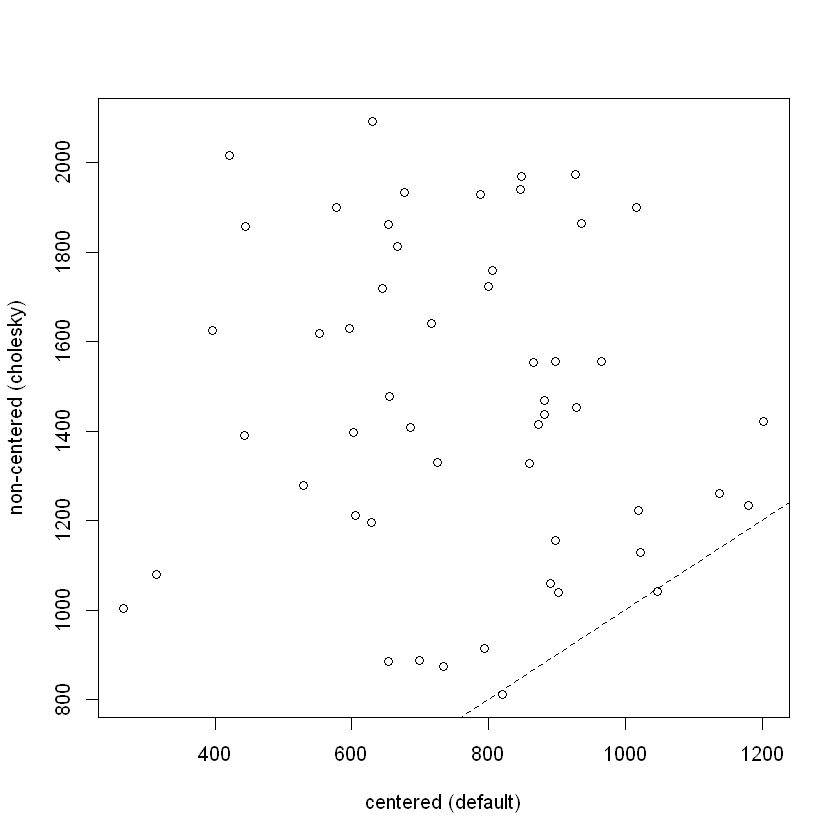

In [26]:
## R code 14.20
# extract n_eff values for each model
neff_nc <- precis(m14.3,3,pars=c("alpha","beta"))$n_eff
neff_c <- precis(m14.2,3,pars=c("alpha","beta"))$n_eff
plot( neff_c , neff_nc , xlab="centered (default)" ,
    ylab="non-centered (cholesky)" , lwd=1.5 )
abline(a=0,b=1,lty=2)


In [32]:
precis( m14.3 , depth=2 , pars=c("sigma_actor","sigma_block") )

,mean,sd,5.5%,94.5%,n_eff,Rhat
sigma_actor[1],1.3995777,0.4872363,0.77317928,2.2828430,671.6991,1.0031901
sigma_actor[2],0.9319067,0.4180889,0.41320823,1.6982751,973.3103,1.0031276
sigma_actor[3],1.8426106,0.5563785,1.11932971,2.7626145,879.8985,1.0055256
sigma_actor[4],1.5630661,0.5583437,0.83831200,2.5932537,1180.7426,1.0021644
sigma_block[1],0.4248146,0.3263842,0.03643476,1.0041230,702.5186,1.0009731
sigma_block[2],0.4162679,0.3355671,0.03549822,1.0405179,846.5839,1.0001586
sigma_block[3],0.3091995,0.2767598,0.02299397,0.8434509,1722.1659,0.9989866
sigma_block[4],0.4839426,0.3914502,0.03903798,1.1604460,1310.6262,1.0019566


In [35]:
precis( m14.3 , depth=2 )

168 matrix parameters hidden. Use depth=3 to show them.


,mean,sd,5.5%,94.5%,n_eff,Rhat
g[1],0.215068769,0.5011301,-0.556317008,1.0225732,729.8878,1.0036098
g[2],0.663957780,0.4188147,0.006875999,1.3131958,803.7660,1.0036924
g[3],0.006984381,0.6007983,-0.920572453,0.9631128,1036.5073,1.0023850
g[4],0.679105498,0.5229463,-0.119102067,1.5623421,1202.9810,0.9996358
sigma_actor[1],1.399577737,0.4872363,0.773179278,2.2828430,671.6991,1.0031901
sigma_actor[2],0.931906706,0.4180889,0.413208230,1.6982751,973.3103,1.0031276
sigma_actor[3],1.842610575,0.5563785,1.119329709,2.7626145,879.8985,1.0055256
sigma_actor[4],1.563066113,0.5583437,0.838311997,2.5932537,1180.7426,1.0021644
sigma_block[1],0.424814611,0.3263842,0.036434760,1.0041230,702.5186,1.0009731
sigma_block[2],0.416267883,0.3355671,0.035498217,1.0405179,846.5839,1.0001586


In [33]:
m14.3  %>% str

Formal class 'ulam' [package "rethinking"] with 10 slots
  ..@ call          : language ulam(flist = alist(L ~ binomial(1, p), logit(p) <- g[tid] + alpha[actor,      tid] + beta[block_id, tid], transpa| __truncated__ ...
  ..@ model         : chr "data{\n    int L[504];\n    int block_id[504];\n    int actor[504];\n    int tid[504];\n}\nparameters{\n    mat"| __truncated__
  ..@ stanfit       :Formal class 'stanfit' [package "rstan"] with 10 slots
  .. .. ..@ model_name: chr "500908d37fcc91413600b82f49ca033d"
  .. .. ..@ model_pars: chr [1:14] "z_actor" "z_block" "g" "sigma_actor" ...
  .. .. ..@ par_dims  :List of 14
  .. .. .. ..$ z_actor    : num [1:2] 4 7
  .. .. .. ..$ z_block    : num [1:2] 4 6
  .. .. .. ..$ g          : num 4
  .. .. .. ..$ sigma_actor: num 4
  .. .. .. ..$ L_Rho_actor: num [1:2] 4 4
  .. .. .. ..$ sigma_block: num 4
  .. .. .. ..$ L_Rho_block: num [1:2] 4 4
  .. .. .. ..$ alpha      : num [1:2] 7 4
  .. .. .. ..$ beta       : num [1:2] 6 4
  .. .. .. ..$ log_l

## Social relations as correlated varying effects

In [61]:
library(rethinking)
data(KosterLeckie)

## Continous Categories and the Gaussian Process (14.5)

In [63]:
## R code 14.36
# load the distance matrix
library(rethinking)
data(islandsDistMatrix)

# display (measured in thousands of km)
Dmat <- islandsDistMatrix
colnames(Dmat) <- c("Ml","Ti","SC","Ya","Fi","Tr","Ch","Mn","To","Ha")
round(Dmat,1)

,Ml,Ti,SC,Ya,Fi,Tr,Ch,Mn,To,Ha
Malekula,0.0,0.5,0.6,4.4,1.2,2.0,3.2,2.8,1.9,5.7
Tikopia,0.5,0.0,0.3,4.2,1.2,2.0,2.9,2.7,2.0,5.3
Santa Cruz,0.6,0.3,0.0,3.9,1.6,1.7,2.6,2.4,2.3,5.4
Yap,4.4,4.2,3.9,0.0,5.4,2.5,1.6,1.6,6.1,7.2
Lau Fiji,1.2,1.2,1.6,5.4,0.0,3.2,4.0,3.9,0.8,4.9
Trobriand,2.0,2.0,1.7,2.5,3.2,0.0,1.8,0.8,3.9,6.7
Chuuk,3.2,2.9,2.6,1.6,4.0,1.8,0.0,1.2,4.8,5.8
Manus,2.8,2.7,2.4,1.6,3.9,0.8,1.2,0.0,4.6,6.7
Tonga,1.9,2.0,2.3,6.1,0.8,3.9,4.8,4.6,0.0,5.0
Hawaii,5.7,5.3,5.4,7.2,4.9,6.7,5.8,6.7,5.0,0.0


In [66]:
Dmat %>% round(2)

,Ml,Ti,SC,Ya,Fi,Tr,Ch,Mn,To,Ha
Malekula,0.00,0.48,0.63,4.36,1.23,2.04,3.18,2.79,1.86,5.68
Tikopia,0.48,0.00,0.32,4.17,1.24,2.01,2.88,2.67,1.97,5.28
Santa Cruz,0.63,0.32,0.00,3.86,1.55,1.71,2.59,2.36,2.28,5.40
Yap,4.36,4.17,3.86,0.00,5.39,2.46,1.55,1.62,6.14,7.18
Lau Fiji,1.23,1.24,1.55,5.39,0.00,3.22,4.03,3.91,0.76,4.88
Trobriand,2.04,2.01,1.71,2.46,3.22,0.00,1.80,0.85,3.89,6.65
Chuuk,3.18,2.88,2.59,1.55,4.03,1.80,0.00,1.21,4.79,5.79
Manus,2.79,2.67,2.36,1.62,3.91,0.85,1.21,0.00,4.62,6.72
Tonga,1.86,1.97,2.28,6.14,0.76,3.89,4.79,4.62,0.00,5.04
Hawaii,5.68,5.28,5.40,7.18,4.88,6.65,5.79,6.72,5.04,0.00


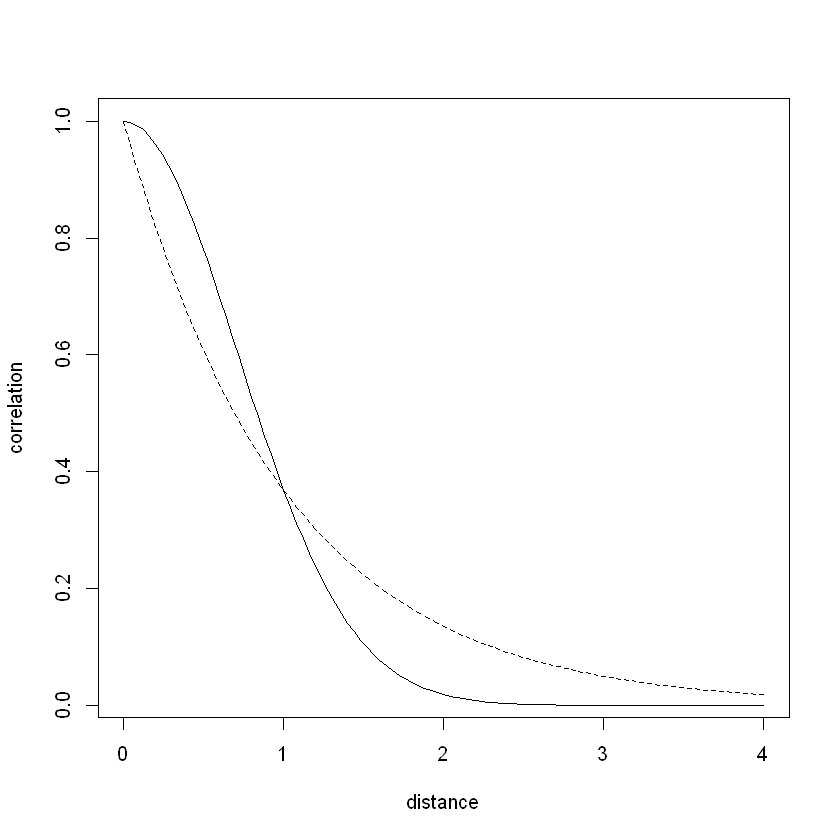

In [40]:
## R code 14.37
# linear
curve( exp(-1*x) , from=0 , to=4 , lty=2 ,
    xlab="distance" , ylab="correlation" )

# squared
curve( exp(-1*x^2) , add=TRUE )

In [37]:
## R code 14.38
data(Kline2) # load the ordinary data, now with coordinates
d <- Kline2
d$society <- 1:10 # index observations

In [41]:
dat_list <- list(
    T = d$total_tools,
    P = d$population,
    society = d$society,
    Dmat=islandsDistMatrix )

In [42]:
m14.7 <- ulam(
    alist(
        T ~ dpois(lambda),
        lambda <- (a*P^b/g)*exp(k[society]),
        vector[10]:k ~ multi_normal( 0 , SIGMA ),
        matrix[10,10]:SIGMA <- cov_GPL2( Dmat , etasq , rhosq , 0.01 ),
        c(a,b,g) ~ dexp( 1 ),
        etasq ~ dexp( 2 ),
        rhosq ~ dexp( 0.5 )
    ), data=dat_list , chains=4 , cores=4 , iter=2000 )

In [43]:
## R code 14.45
m14.7nc <- ulam(
    alist(
        T ~ dpois(lambda),
        lambda <- (a*P^b/g)*exp(k[society]),

        # non-centered Gaussian Process prior
        transpars> vector[10]: k <<- L_SIGMA * z,
        vector[10]: z ~ normal( 0 , 1 ),
        transpars> matrix[10,10]: L_SIGMA <<- cholesky_decompose( SIGMA ),
        transpars> matrix[10,10]: SIGMA <- cov_GPL2( Dmat , etasq , rhosq , 0.01 ),

        c(a,b,g) ~ dexp( 1 ),
        etasq ~ dexp( 2 ),
        rhosq ~ dexp( 0.5 )
    ), data=dat_list , chains=4 , cores=4 , iter=2000 )

In [ ]:
## R code 14.39
precis( m14.7 , depth=3 )

## R code 14.40
post <- extract.samples(m14.7)

# plot the posterior median covariance function
plot( NULL , xlab="distance (thousand km)" , ylab="covariance" ,
    xlim=c(0,10) , ylim=c(0,2) )

# compute posterior mean covariance
x_seq <- seq( from=0 , to=10 , length.out=100 )
pmcov <- sapply( x_seq , function(x) post$etasq*exp(-post$rhosq*x^2) )
pmcov_mu <- apply( pmcov , 2 , mean )
lines( x_seq , pmcov_mu , lwd=2 )

# plot 60 functions sampled from posterior
for ( i in 1:50 )
    curve( post$etasq[i]*exp(-post$rhosq[i]*x^2) , add=TRUE ,
        col=col.alpha("black",0.3) )

## R code 14.41
# compute posterior median covariance among societies
K <- matrix(0,nrow=10,ncol=10)
for ( i in 1:10 )
    for ( j in 1:10 )
        K[i,j] <- median(post$etasq) *
                  exp( -median(post$rhosq) * islandsDistMatrix[i,j]^2 )
diag(K) <- median(post$etasq) + 0.01

## R code 14.42
# convert to correlation matrix
Rho <- round( cov2cor(K) , 2 )
# add row/col names for convenience
colnames(Rho) <- c("Ml","Ti","SC","Ya","Fi","Tr","Ch","Mn","To","Ha")
rownames(Rho) <- colnames(Rho)
Rho

## R code 14.43
# scale point size to logpop
psize <- d$logpop / max(d$logpop)
psize <- exp(psize*1.5)-2

# plot raw data and labels
plot( d$lon2 , d$lat , xlab="longitude" , ylab="latitude" ,
    col=rangi2 , cex=psize , pch=16 , xlim=c(-50,30) )
labels <- as.character(d$culture)
text( d$lon2 , d$lat , labels=labels , cex=0.7 , pos=c(2,4,3,3,4,1,3,2,4,2) )

# overlay lines shaded by Rho
for( i in 1:10 )
    for ( j in 1:10 )
        if ( i < j )
            lines( c( d$lon2[i],d$lon2[j] ) , c( d$lat[i],d$lat[j] ) ,
                lwd=2 , col=col.alpha("black",Rho[i,j]^2) )

## R code 14.44
# compute posterior median relationship, ignoring distance
logpop.seq <- seq( from=6 , to=14 , length.out=30 )
lambda <- sapply( logpop.seq , function(lp) exp( post$a + post$bp*lp ) )
lambda.median <- apply( lambda , 2 , median )
lambda.PI80 <- apply( lambda , 2 , PI , prob=0.8 )

# plot raw data and labels
plot( d$logpop , d$total_tools , col=rangi2 , cex=psize , pch=16 ,
    xlab="log population" , ylab="total tools" )
text( d$logpop , d$total_tools , labels=labels , cex=0.7 ,
    pos=c(4,3,4,2,2,1,4,4,4,2) )

# display posterior predictions
lines( logpop.seq , lambda.median , lty=2 )
lines( logpop.seq , lambda.PI80[1,] , lty=2 )
lines( logpop.seq , lambda.PI80[2,] , lty=2 )

# overlay correlations
for( i in 1:10 )
    for ( j in 1:10 )
        if ( i < j )
            lines( c( d$logpop[i],d$logpop[j] ) ,
                   c( d$total_tools[i],d$total_tools[j] ) ,
                   lwd=2 , col=col.alpha("black",Rho[i,j]^2) )

# Misc

## rlkjcorr

[1] 0.9985735

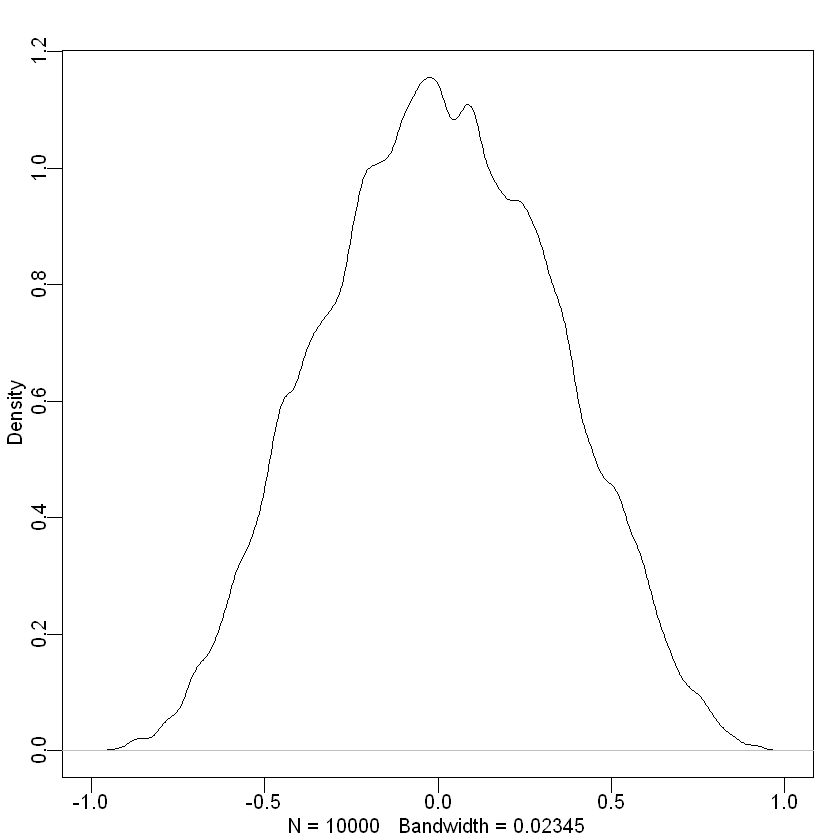

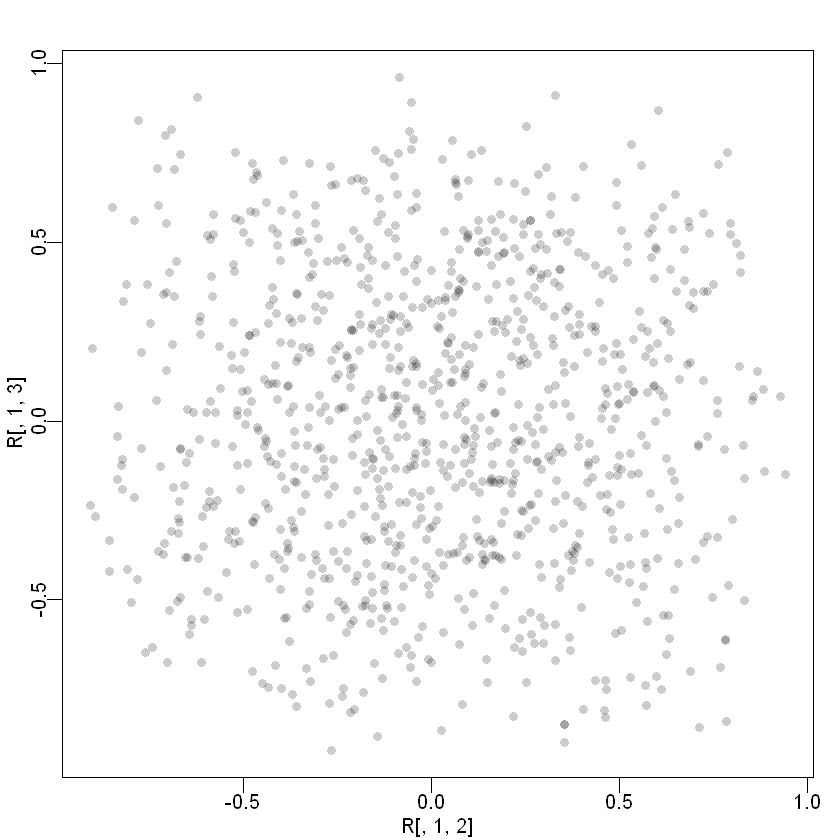

In [34]:
R <- rlkjcorr(n=1,K=2,eta=4)
dlkjcorr(R,4)

# plot density of correlation
R <- rlkjcorr(1e4,K=2,eta=4)
dens( R[,1,2] )

# visualize 3x3 matrix
R <- rlkjcorr(1e3,K=3,eta=2)
plot( R[,1,2] , R[,1,3] , col=col.alpha("black",0.2) , pch=16 )

1,3
2,4


Warning message:
"package 'MASS' was built under R version 3.5.2"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



ERROR: Error in symbols[[left[1]]]$dims[[1]]: object of type 'symbol' is not subsettable


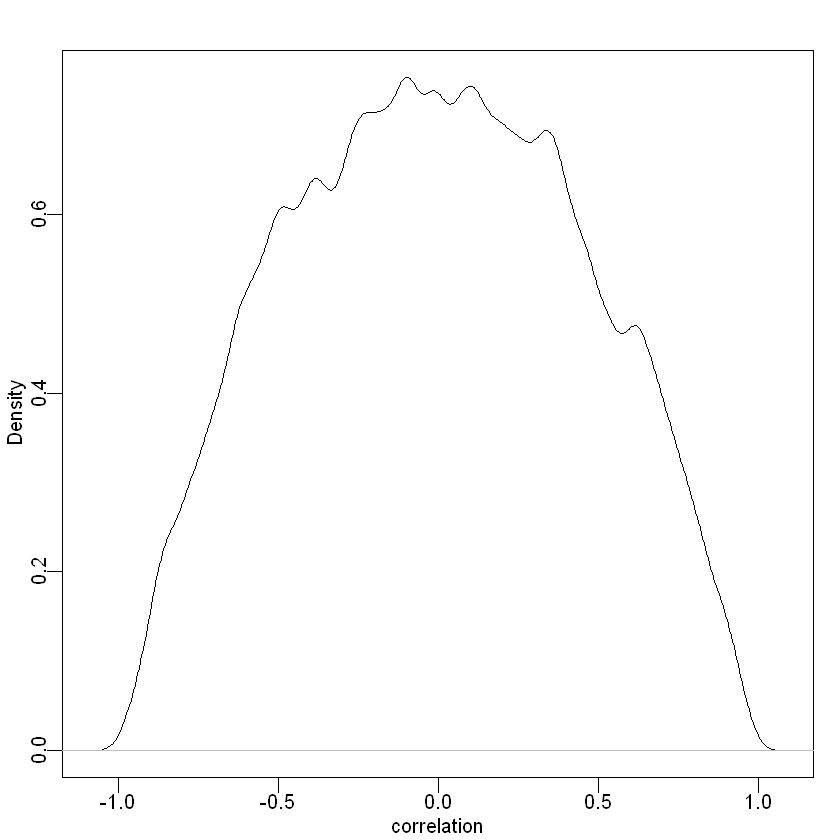

In [2]:
## R code 14.1
a <- 3.5            # average morning wait time
b <- (-1)           # average difference afternoon wait time
sigma_a <- 1        # std dev in intercepts
sigma_b <- 0.5      # std dev in slopes
rho <- (-0.7)       # correlation between intercepts and slopes

## R code 14.2
Mu <- c( a , b )

## R code 14.3
cov_ab <- sigma_a*sigma_b*rho
Sigma <- matrix( c(sigma_a^2,cov_ab,cov_ab,sigma_b^2) , ncol=2 )

## R code 14.4
matrix( c(1,2,3,4) , nrow=2 , ncol=2 )

## R code 14.5
sigmas <- c(sigma_a,sigma_b) # standard deviations
Rho <- matrix( c(1,rho,rho,1) , nrow=2 ) # correlation matrix

# now matrix multiply to get covariance matrix
Sigma <- diag(sigmas) %*% Rho %*% diag(sigmas)

## R code 14.6
N_cafes <- 20

## R code 14.7
library(MASS)
set.seed(5) # used to replicate example
vary_effects <- mvrnorm( N_cafes , Mu , Sigma )

## R code 14.8
a_cafe <- vary_effects[,1]
b_cafe <- vary_effects[,2]

## R code 14.10
set.seed(22)
N_visits <- 10
afternoon <- rep(0:1,N_visits*N_cafes/2)
cafe_id <- rep( 1:N_cafes , each=N_visits )
mu <- a_cafe[cafe_id] + b_cafe[cafe_id]*afternoon
sigma <- 0.5  # std dev within cafes
wait <- rnorm( N_visits*N_cafes , mu , sigma )
d <- data.frame( cafe=cafe_id , afternoon=afternoon , wait=wait )

## R code 14.11
R <- rlkjcorr( 1e4 , K=2 , eta=2 )
dens( R[,1,2] , xlab="correlation" )

## R code 14.12
m14.1 <- ulam(
  alist(
    wait ~ normal( mu , sigma ),
    mu <- a_cafe[cafe] + b_cafe[cafe]*afternoon,
    c(a_cafe,b_cafe)[cafe] ~ multi_normal( c(a,b) , Rho , sigma_cafe ),
    a ~ normal(5,2),
    b ~ normal(-1,0.5),
    sigma_cafe ~ exponential(1),
    sigma ~ exponential(1),
    Rho ~ lkj_corr(2)
  ) , data=d , chains=4 , cores=4 )